<a href="https://colab.research.google.com/github/Swapn2/Time-series-data_and_models/blob/main/Time_series(ACF_PACF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()

In [5]:
df = pd.read_csv('/content/ice_cream.csv')

In [6]:
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [8]:
df.rename(columns = {'DATE':'date','IPN31152N':'production'},inplace = True)

In [9]:
df

,date,production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        577 non-null    object 
 1   production  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [11]:
df['date'] = pd.to_datetime(df.date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        577 non-null    datetime64[ns]
 1   production  577 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.1 KB


In [14]:
df.set_index('date',inplace = True)

In [15]:
df

,production
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [16]:
start_date = pd.to_datetime('2010-01-01')
df = df[start_date:]

In [17]:
df

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2010-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   production  121 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


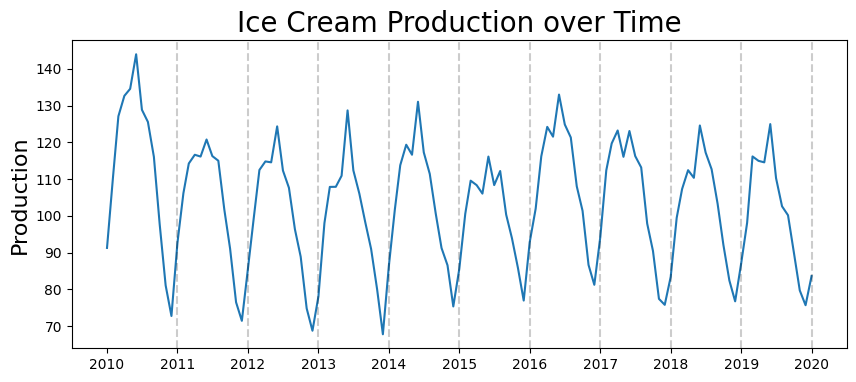

In [20]:
plt.figure(figsize=(10,4))
plt.plot(df.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

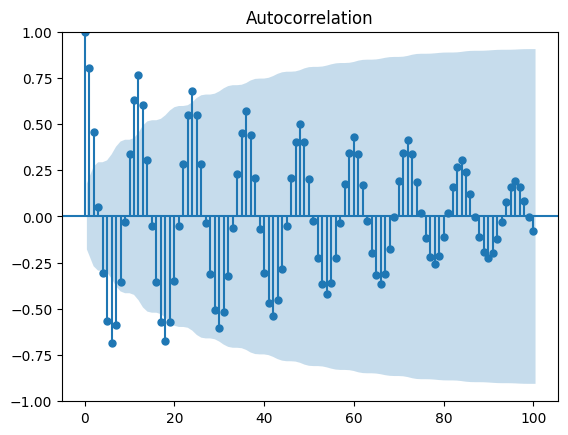

In [22]:
acf_plot = plot_acf(df.production, lags=100)
# ACF of a pure AR(1) process (autoregressive of order 1) decays exponentially.

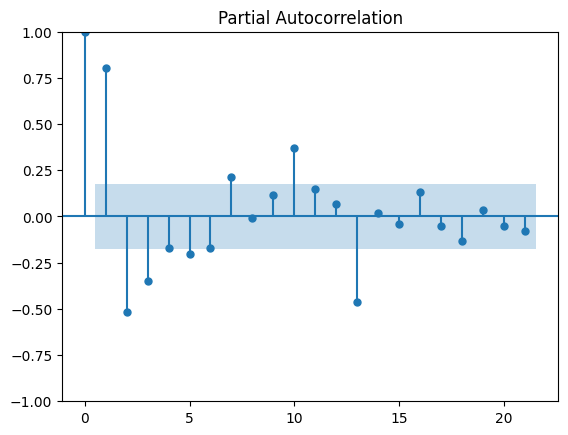

In [24]:
pacf_plot = plot_pacf(df.production)
# Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

In [25]:
import yfinance as yf

In [26]:
tickerSymbol = 'SPY'

In [27]:
tickerdata = yf.Ticker(tickerSymbol)

In [30]:
tickerDf = tickerdata.history(start='2015-1-1', end='2020-01-01')

In [32]:
tickerDf[['Close']]

,Close
Date,
2015-01-02 00:00:00-05:00,171.567993
2015-01-05 00:00:00-05:00,168.469574
2015-01-06 00:00:00-05:00,166.882736
2015-01-07 00:00:00-05:00,168.962372
2015-01-08 00:00:00-05:00,171.960587
...,...
2019-12-24 00:00:00-05:00,296.051819
2019-12-26 00:00:00-05:00,297.627808
2019-12-27 00:00:00-05:00,297.553986


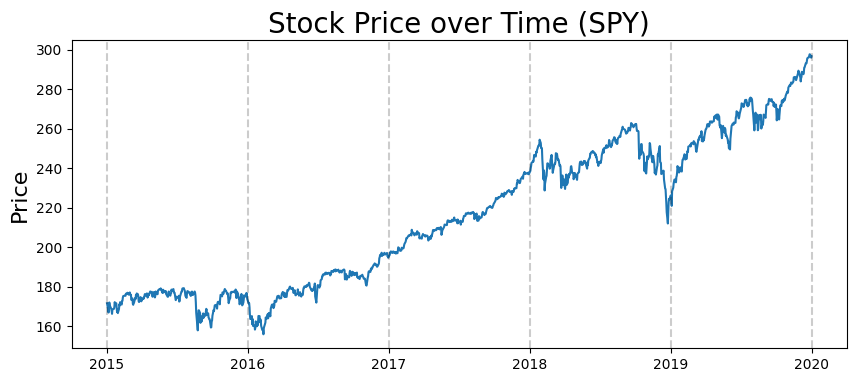

In [33]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [34]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [35]:
first_diffs

array([-3.09841919, -1.58683777,  2.07963562, ..., -1.64044189,
        0.71881104,  0.        ])

In [36]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

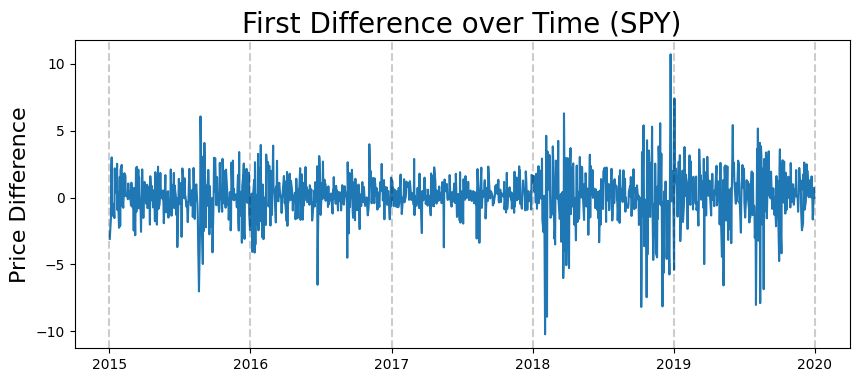

In [37]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

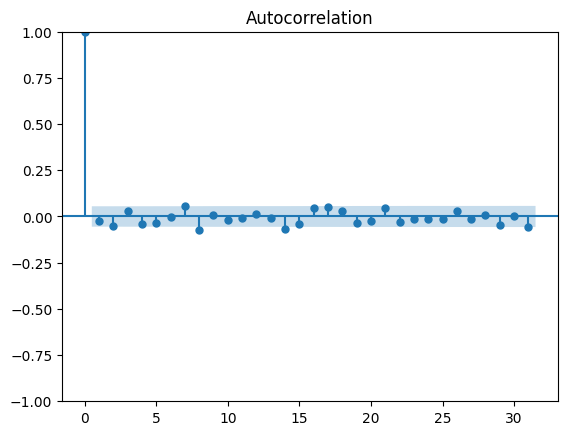

In [40]:
acf_plot = plot_acf(tickerDf.FirstDifference)
# ACF isn't that informative

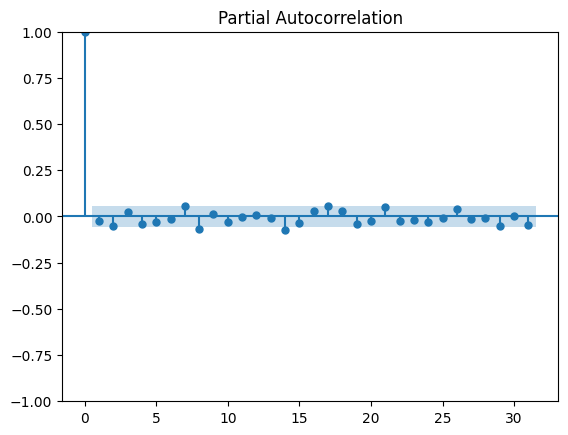

In [39]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)